In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import json

plt.rcParams.update({"text.usetex": True,})

In [4]:
def readShapR_csv(csv_list):
    df = pd.DataFrame()

    for filename in csv_list:
        if df.empty:
            df = pd.read_csv(filename)
        else:
            df = pd.concat([df, pd.read_csv(filename)])
    df.columns = df.columns.str.lstrip('dt.')
            
    return df.drop("none", axis=1)

In [5]:
def makeMoney(causal_ordering, regions, months, confounding, filename):

    plt.figure(figsize=(24,20))
    d_list = {}

    for co in causal_ordering:
        d_list[co] = {}
        for region in regions:
            csv_list = glob.glob("../results/R-V2/confirmed/"+co+"/"+region+"/causality-"+months+"-"+region+"-160-"+confounding+"/*.csv")
            df = readShapR_csv(csv_list)
            d_list[co][region] = pd.DataFrame(df.iloc[:,1:14].abs().mean(), columns=["SHAP"])#.sort_values(ascending=True)

            corr = [np.corrcoef(df[df.columns[i+1]],df[df.columns[i+15]])[0,1] for i in range(13)]
            d_list[co][region]['corr'] = corr
            d_list[co][region] = d_list[co][region].sort_values(by='SHAP', ascending = True)
            colors = np.where(d_list[co][region]['corr'].values > 0,'#9f79ad','#c1a8ca')

            plt_no = 3 * (len(d_list.keys()) - 1) + len(d_list[co].keys())
            plt.subplot(3,3,plt_no)
            plt.barh(y=d_list[co][region].index, width=d_list[co][region]['SHAP'].values, zorder=99, color=colors)
            plt.xlabel(r'$\overline{|S_v|}$', fontsize=18)
            plt.yticks(fontsize=16)
            plt.xticks(fontsize=16)
            ax = plt.gca()
            corr = d_list[co][region]['corr'].values

            plt.grid(':', axis='x')
            plt.xlim(0,0.25)

    plt.tight_layout()
    plt.savefig('../plots/'+filename[:-4]+"-confirmed-"+months+"-"+confounding+filename[-4:], dpi=300)
    plt.show()

### Non-Confounding ["CO1", "CO2", "CO3"]

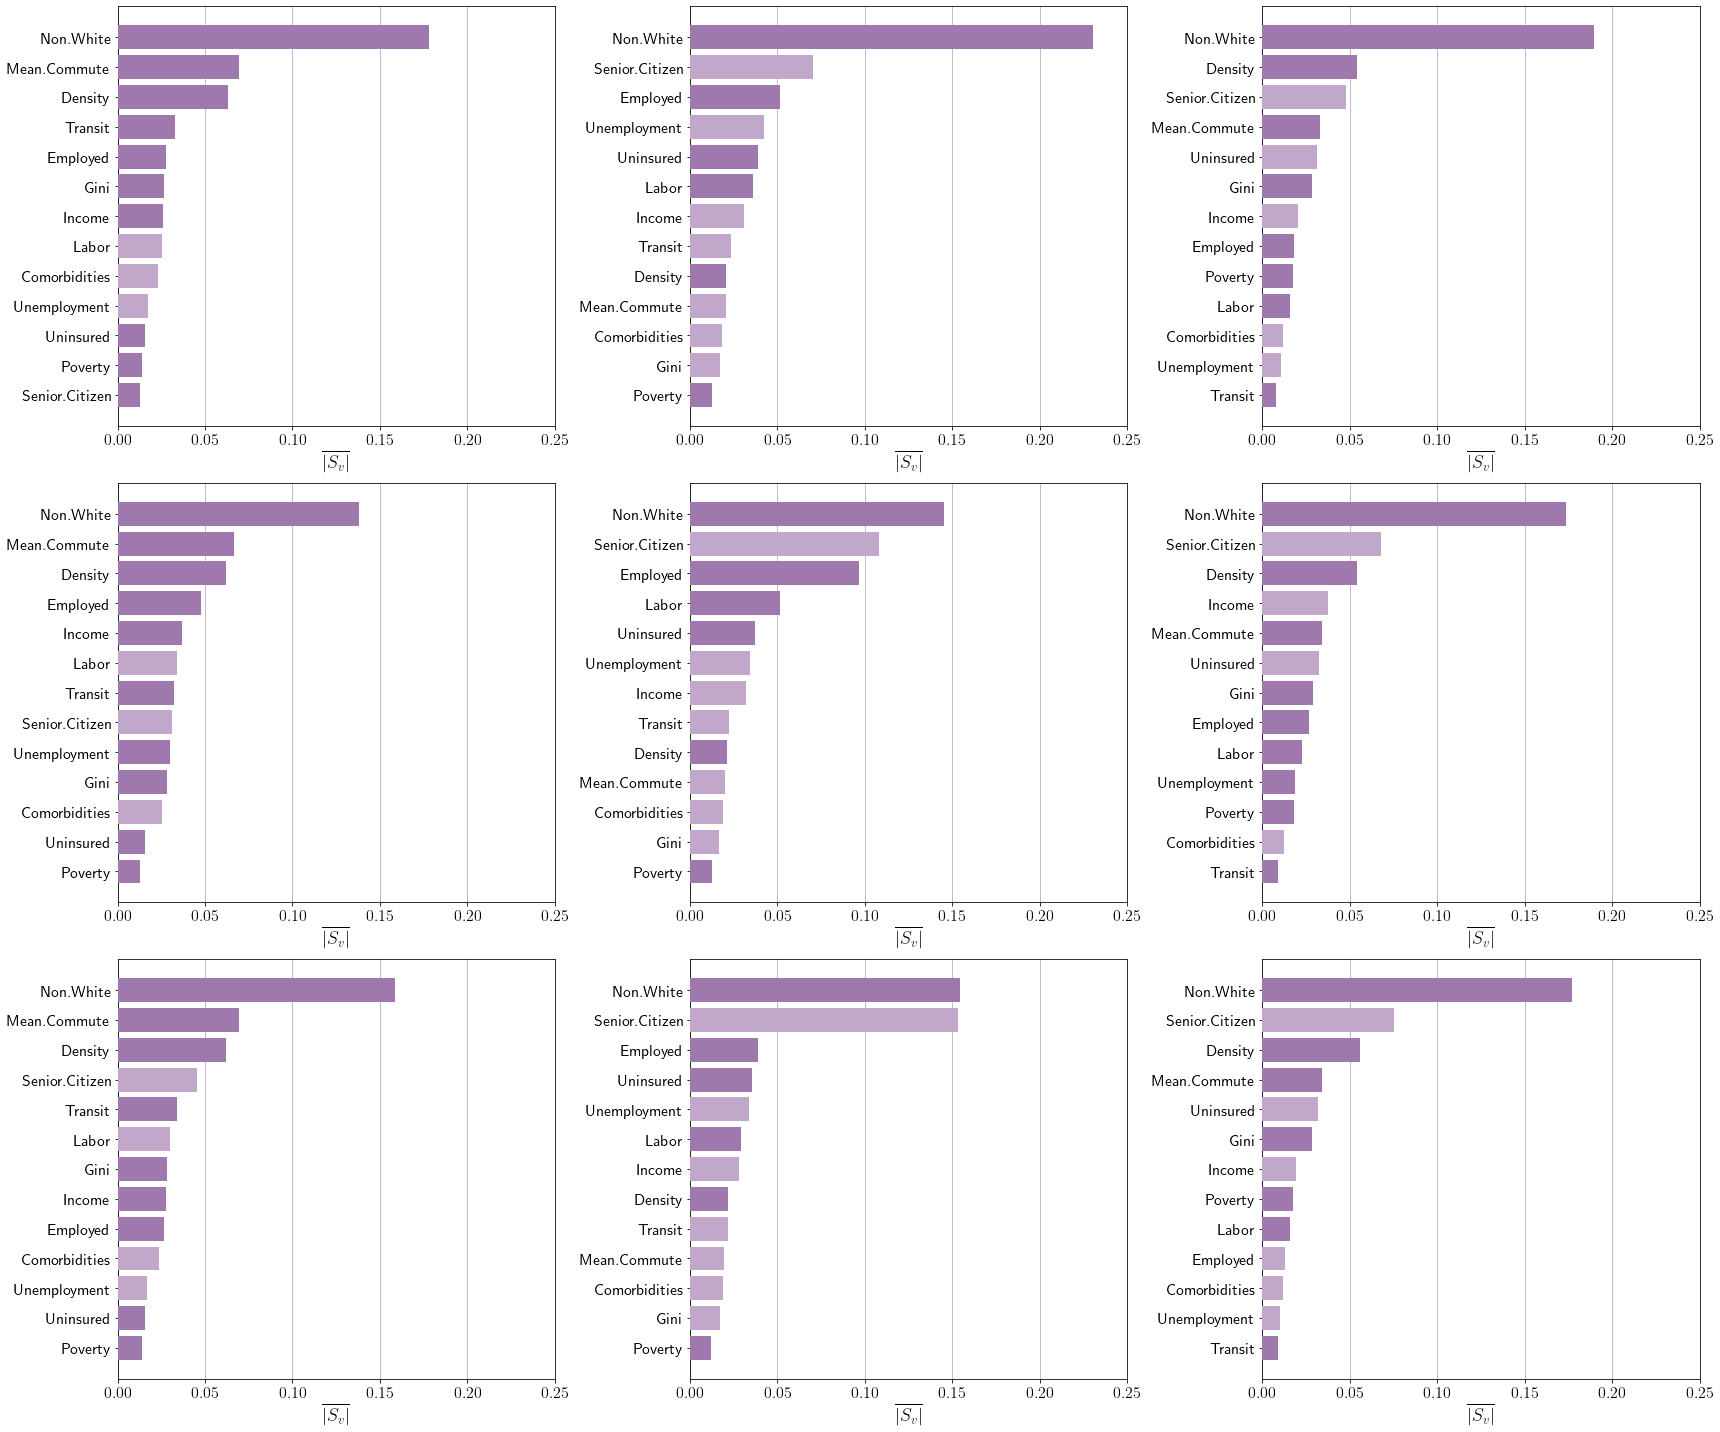

In [6]:
causal_ordering = ["CO1", "CO2", "CO3"]
regions = ["EC", "WC", "SS"]
months = "FEB-JUL"
confounding = "NC"
filename = "moneyplot.png"
makeMoney(causal_ordering, regions, months, confounding, filename)

### Non-Confounding ["CO4", "CO5", "CO6"]

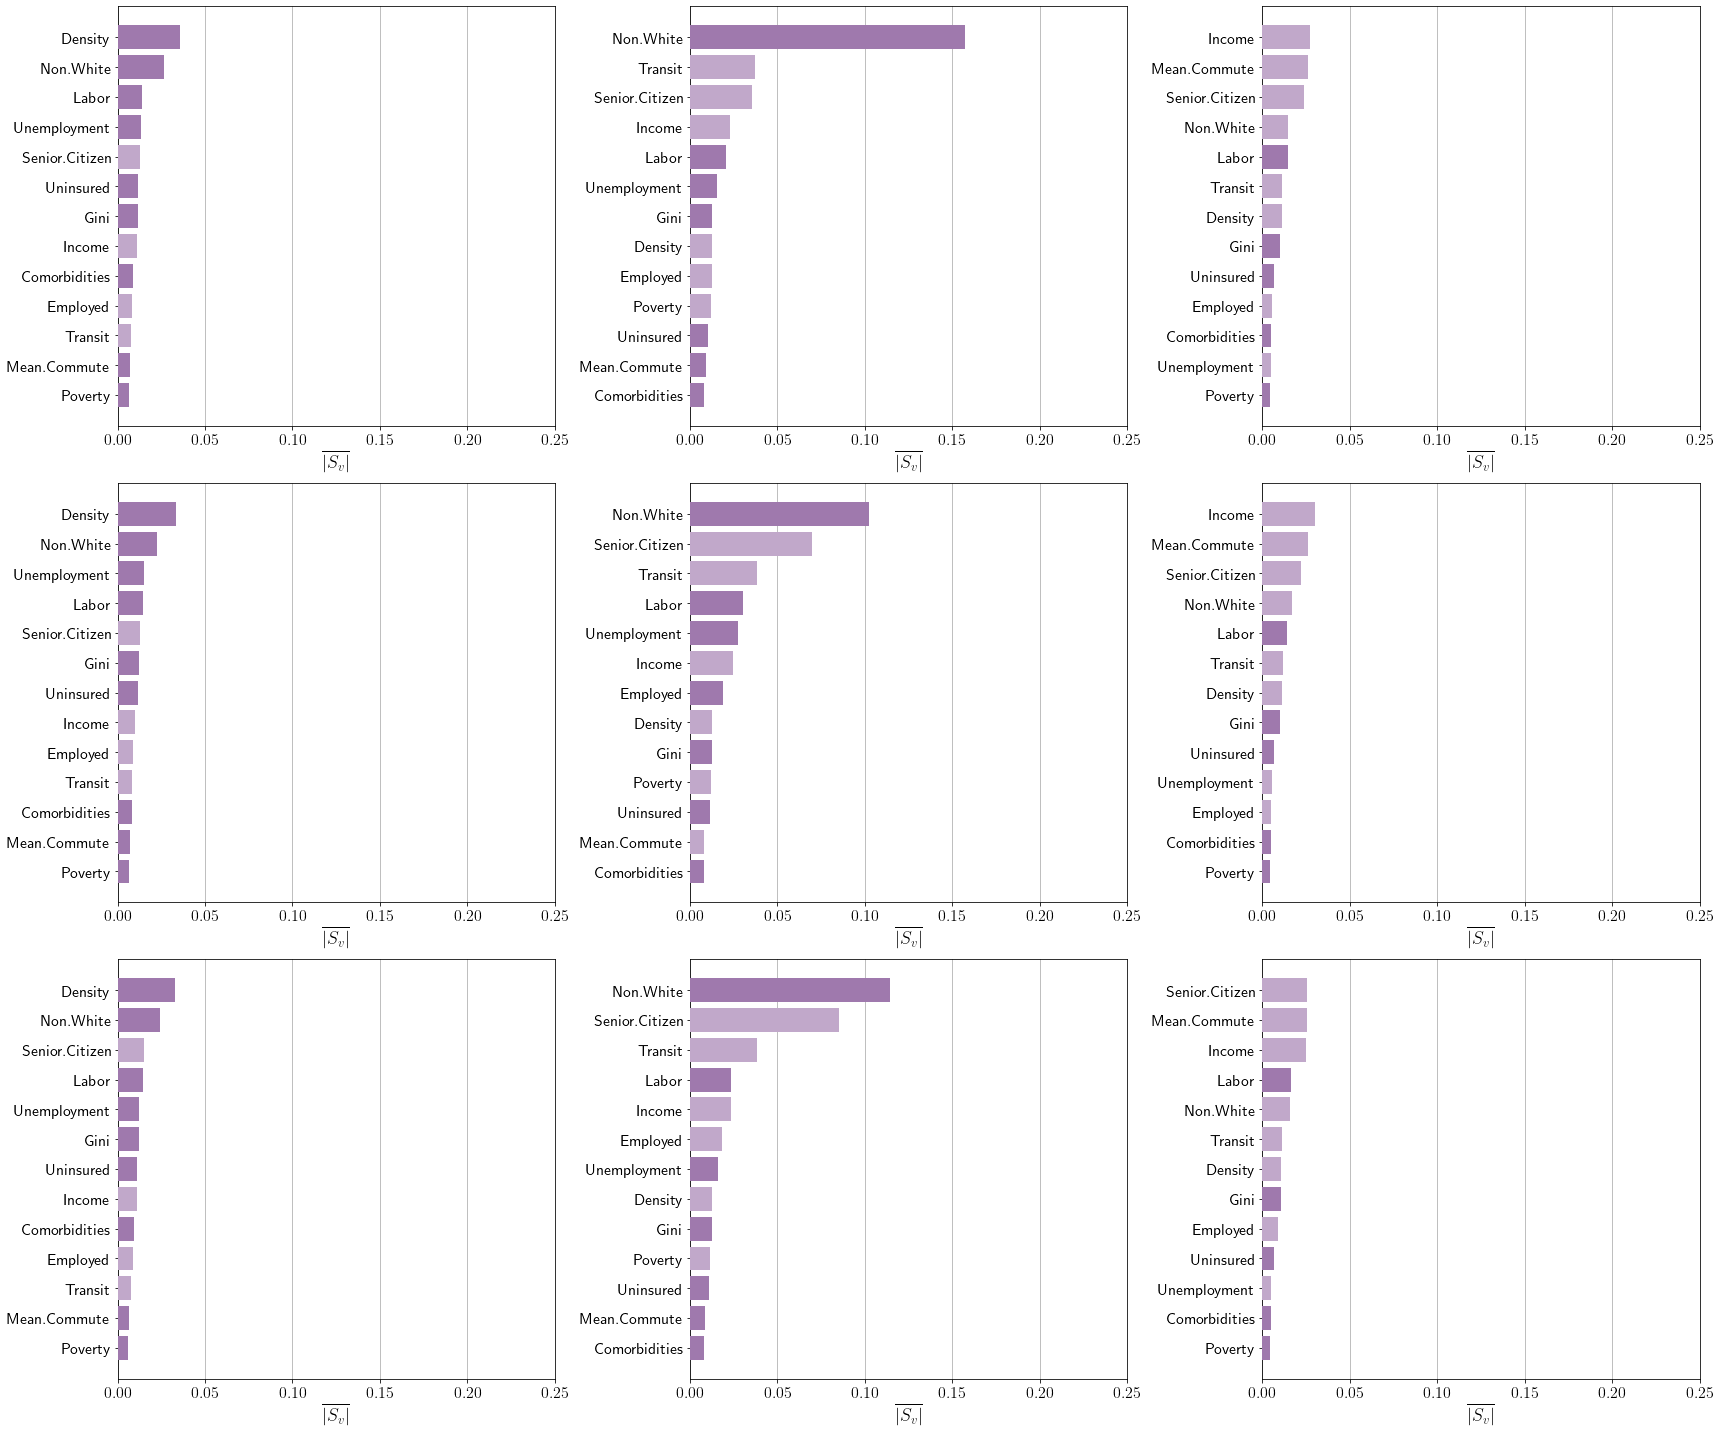

In [7]:
causal_ordering = ["CO1", "CO2", "CO3"]
regions = ["EC", "WC", "SS"]
months = "JUL-JAN"
confounding = "NC"
filename = "moneyplot.png"
makeMoney(causal_ordering, regions, months, confounding, filename)

### Confounding ["CO1", "CO2", "CO3"]

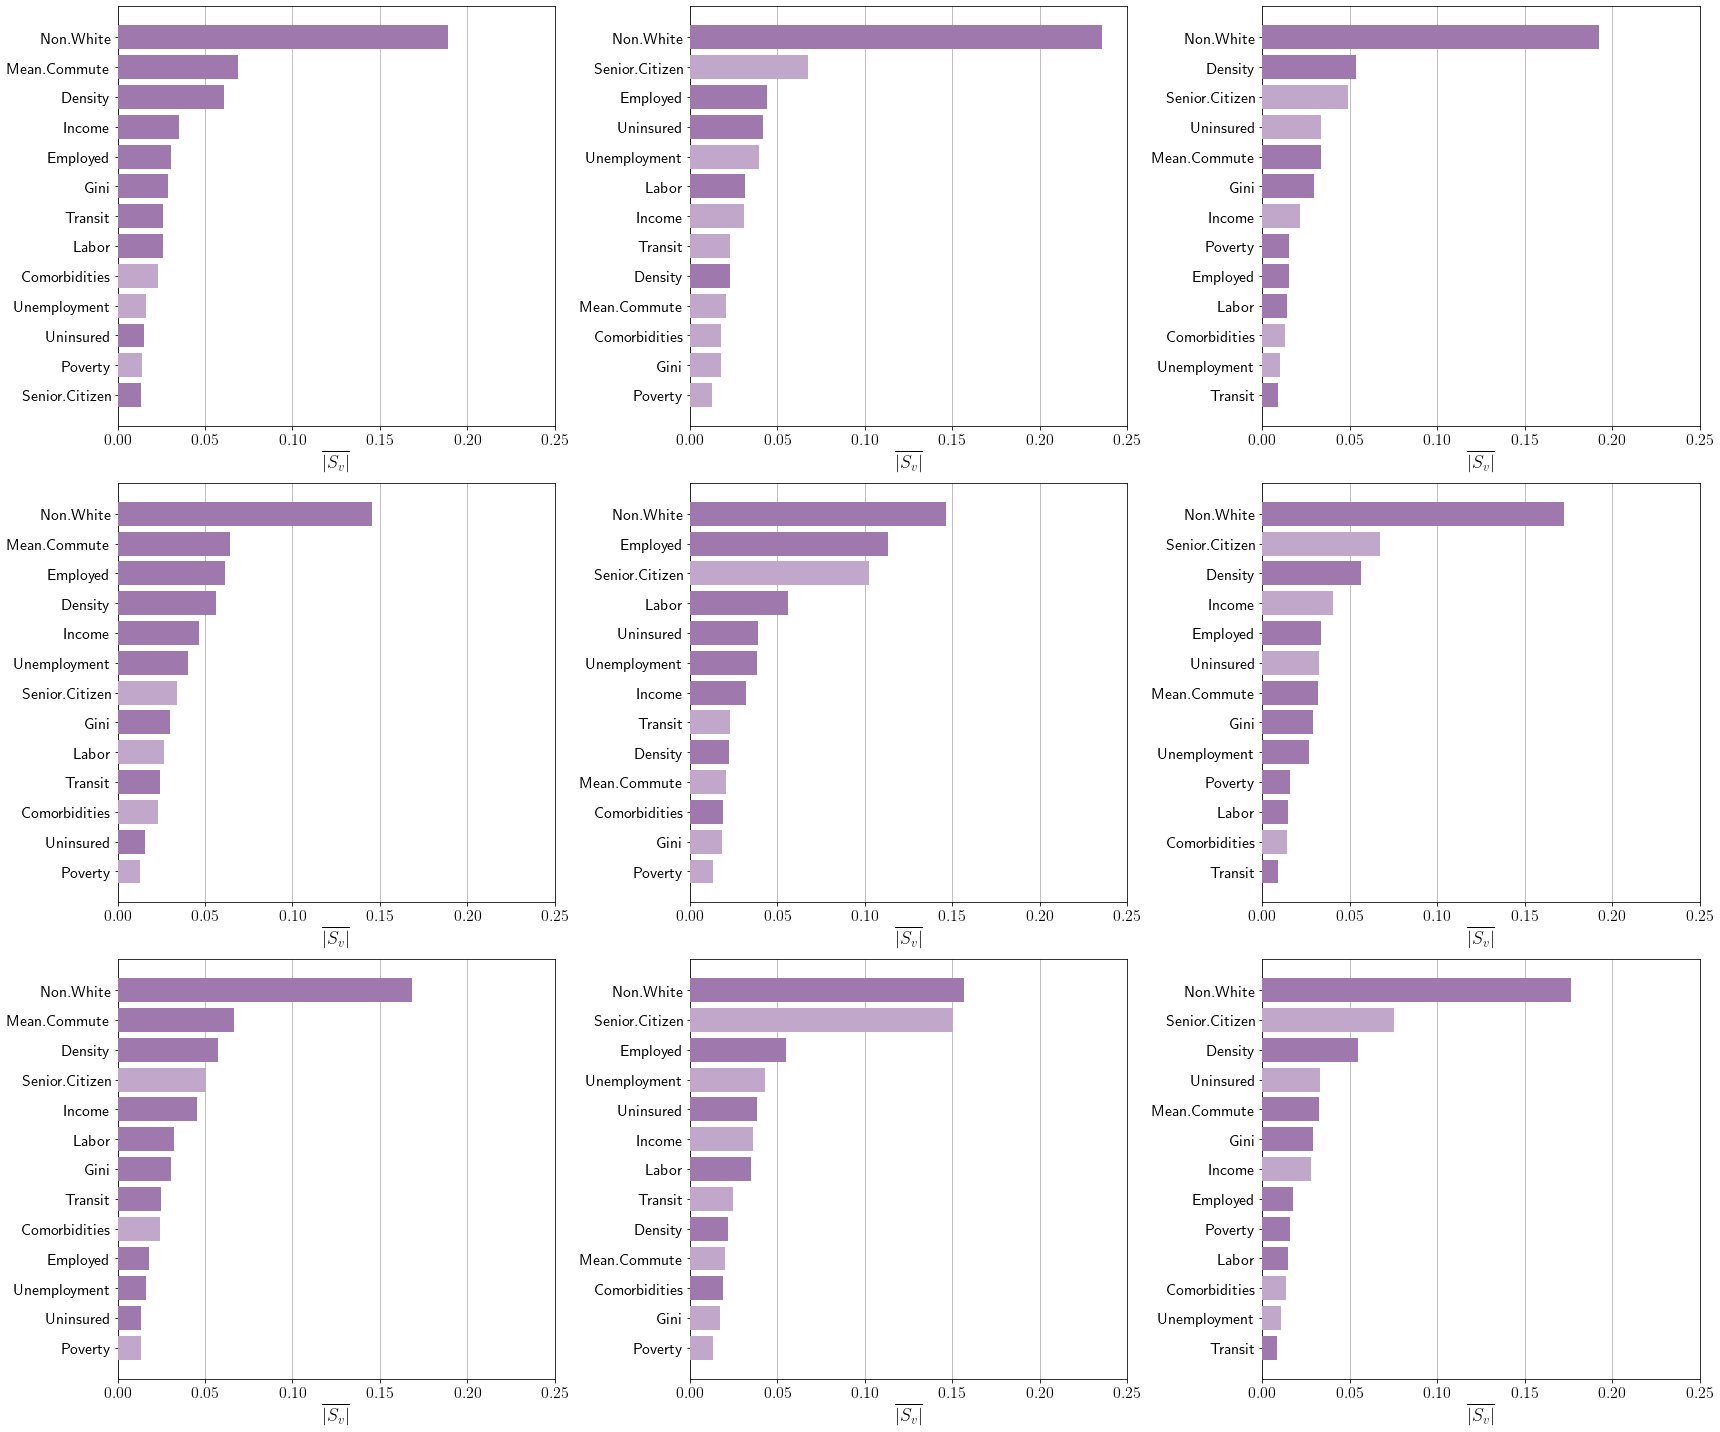

In [8]:
causal_ordering = ["CO1", "CO2", "CO3"]
regions = ["EC", "WC", "SS"]
months = "FEB-JUL"
confounding = "CO"
filename = "moneyplot.png"
makeMoney(causal_ordering, regions, months, confounding, filename)

### Confounding ["CO4", "CO5", "CO6"]

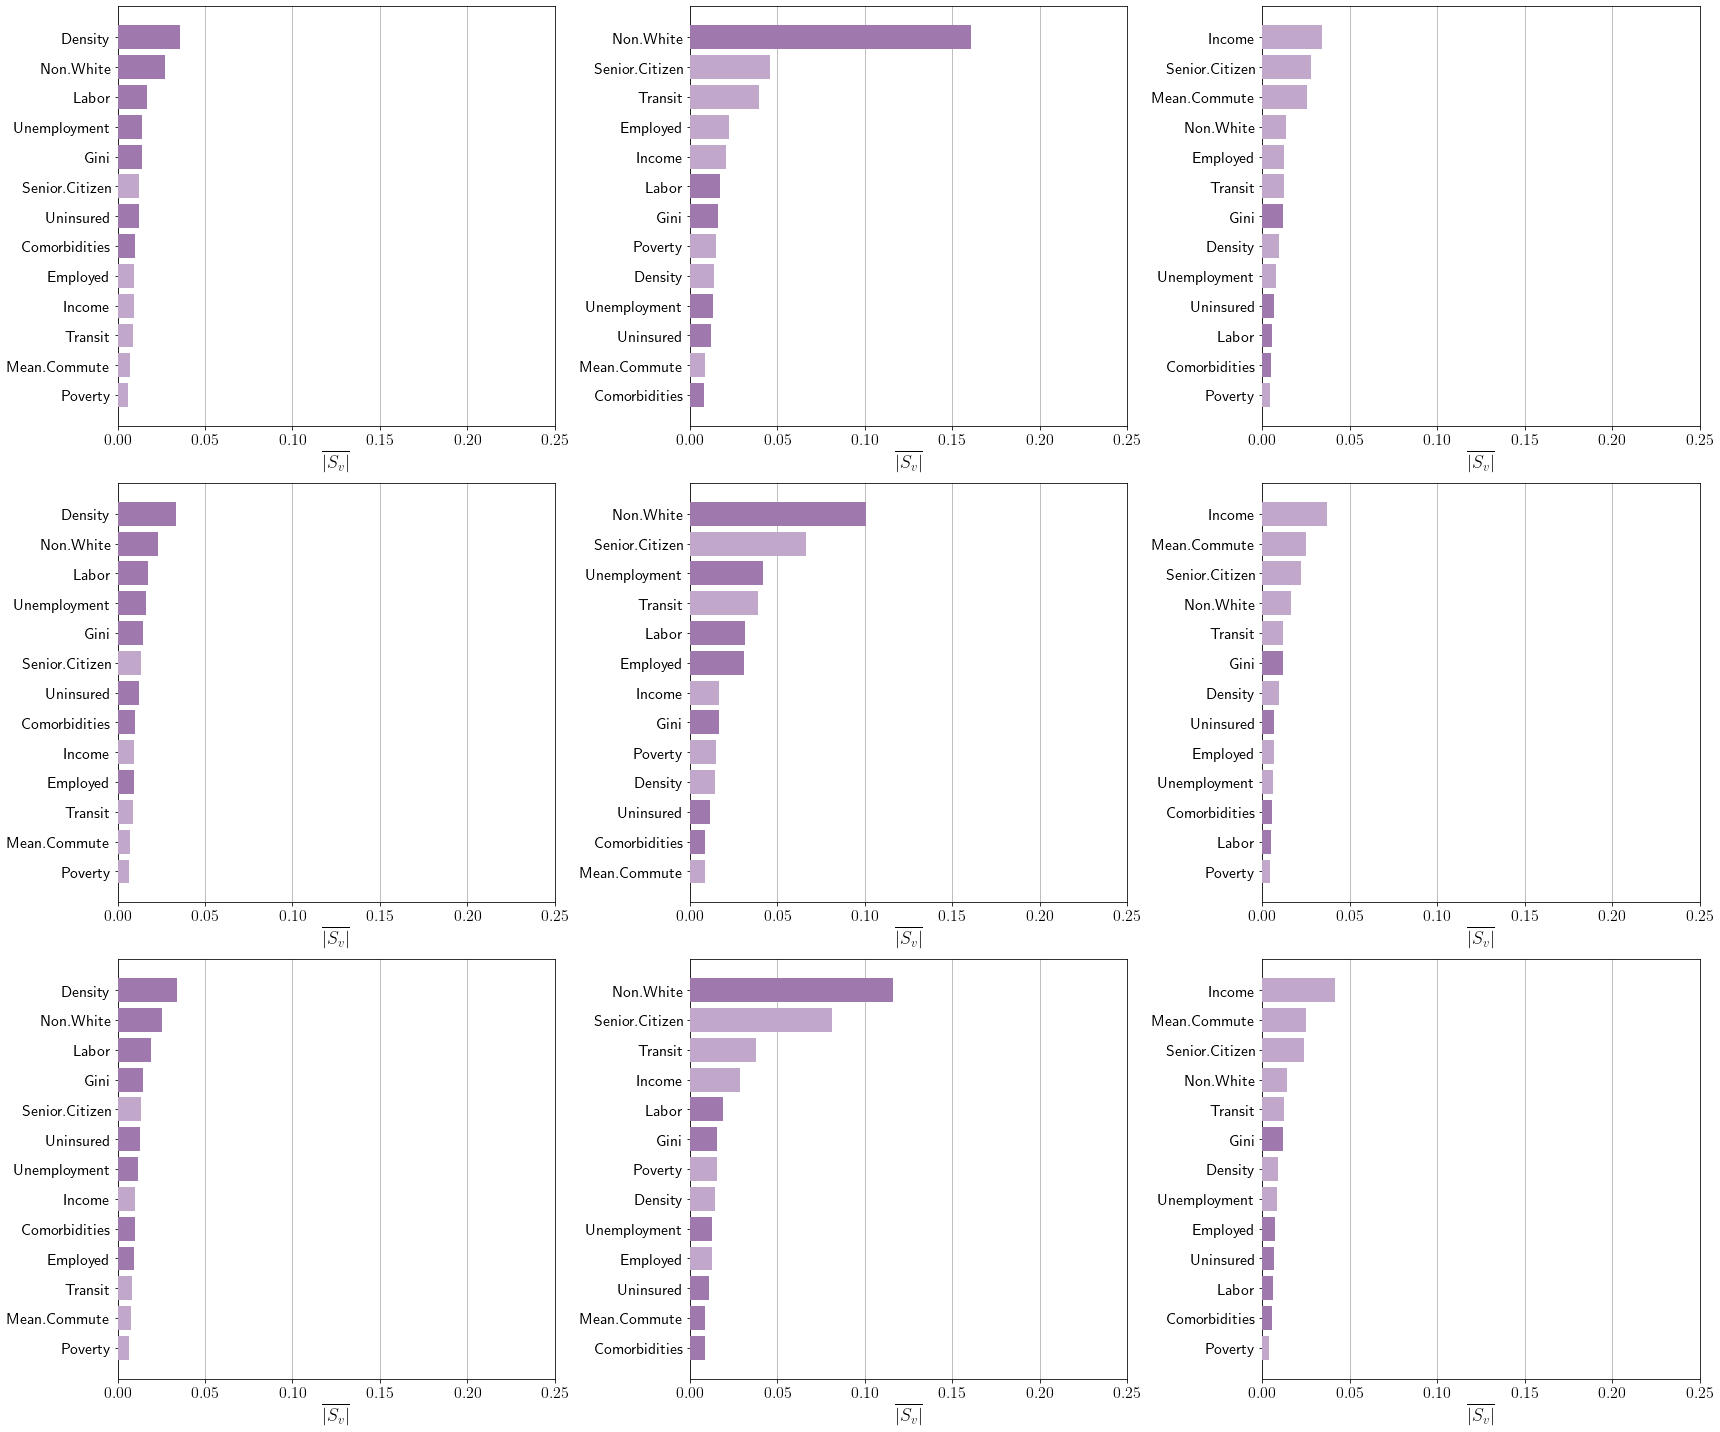

In [9]:
causal_ordering = ["CO1", "CO2", "CO3"]
regions = ["EC", "WC", "SS"]
months = "JUL-JAN"
confounding = "CO"
filename = "moneyplot.png"
makeMoney(causal_ordering, regions, months, confounding, filename)